[0]	validation_0-rmse:298.99530	validation_1-rmse:316.63442
[1]	validation_0-rmse:280.93292	validation_1-rmse:298.66414
[2]	validation_0-rmse:265.25327	validation_1-rmse:283.86116
[3]	validation_0-rmse:251.74493	validation_1-rmse:270.98343
[4]	validation_0-rmse:240.16307	validation_1-rmse:261.07113
[5]	validation_0-rmse:230.18527	validation_1-rmse:251.33954
[6]	validation_0-rmse:221.72144	validation_1-rmse:243.36139
[7]	validation_0-rmse:214.53991	validation_1-rmse:237.31560
[8]	validation_0-rmse:208.34421	validation_1-rmse:232.06855
[9]	validation_0-rmse:203.00677	validation_1-rmse:227.73949
[10]	validation_0-rmse:198.47151	validation_1-rmse:224.50817
[11]	validation_0-rmse:194.64181	validation_1-rmse:221.21284
[12]	validation_0-rmse:191.27473	validation_1-rmse:218.53479
[13]	validation_0-rmse:188.49131	validation_1-rmse:216.67682
[14]	validation_0-rmse:186.03943	validation_1-rmse:215.04151
[15]	validation_0-rmse:183.95863	validation_1-rmse:213.78600
[16]	validation_0-rmse:182.11227	v

c:\Users\John\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost Grid Search Best params:  {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 7}
First Model Mean Root Mean Squared Error: 205.637 (39.907)


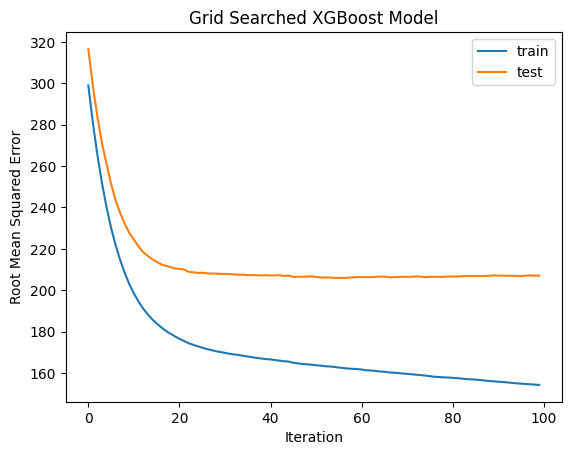

[0]	validation_0-rmse:252.24330	validation_1-rmse:284.21652
[1]	validation_0-rmse:206.18267	validation_1-rmse:252.04965
[2]	validation_0-rmse:176.03975	validation_1-rmse:234.96702
[3]	validation_0-rmse:155.11499	validation_1-rmse:227.42457
[4]	validation_0-rmse:141.56365	validation_1-rmse:222.30878
[5]	validation_0-rmse:131.05498	validation_1-rmse:220.50501
[6]	validation_0-rmse:123.78102	validation_1-rmse:219.08198
[7]	validation_0-rmse:120.10204	validation_1-rmse:218.95384
[8]	validation_0-rmse:114.59645	validation_1-rmse:219.51401
[9]	validation_0-rmse:111.69391	validation_1-rmse:219.97417
[10]	validation_0-rmse:107.85077	validation_1-rmse:220.09687
[11]	validation_0-rmse:105.17596	validation_1-rmse:221.35900
[12]	validation_0-rmse:103.58283	validation_1-rmse:221.35454
[13]	validation_0-rmse:101.23186	validation_1-rmse:221.46121
[14]	validation_0-rmse:99.36651	validation_1-rmse:220.94405
[15]	validation_0-rmse:96.62923	validation_1-rmse:220.22021
[16]	validation_0-rmse:91.64560	vali

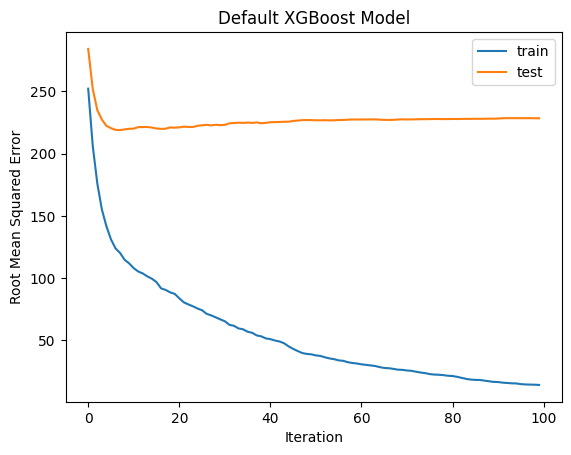

In [15]:
import sklearn
import xgboost as xgb
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import precision_score, recall_score, accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import absolute

df = pd.read_csv("../CSVFiles/EncodedSalesListing.csv")

data = df.drop(columns=["Days on Market"])
labels = df['Days on Market']
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=254)
evalset = [(X_train, Y_train), (X_test, Y_test)]

xgbRGR = xgb.XGBRegressor(verbosity=0)
parameters = {
     "eta"    : [0.1, 0.2, 0.25, 0.3] ,
     "max_depth"        : [2 ,3, 6, 8, 10, 15, 20],
     "min_child_weight" : [0.1, 0.5, 0.8 ,1, 7, 10 ]
    }
CV = GridSearchCV(xgbRGR, parameters,n_jobs=-1,
                    scoring="neg_root_mean_squared_error",
                    cv=3)
CV.fit(X_train, Y_train, eval_set=evalset, eval_metric='rmse')
print("XGBoost Grid Search Best params: ", CV.best_params_)
best = CV.best_estimator_
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(best, X_test, Y_test, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score="raise")
scores = absolute(scores)
print('First Model Mean Root Mean Squared Error: %.3f (%.3f)' % (scores.mean(), scores.std()) )
results = best.evals_result()
plt.title("Grid Searched XGBoost Model")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Iteration")
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()





xgbRGR2 = xgb.XGBRegressor()
xgbRGR2.fit(X_train, Y_train, eval_set=evalset, eval_metric='rmse')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgbRGR2, X_test, Y_test, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score="raise")
scores = absolute(scores)
print('Second Model Mean Root Mean Squared Error: %.3f (%.3f)' % (scores.mean(), scores.std()) )
results = xgbRGR2.evals_result()

# plot learning curves
plt.title("Default XGBoost Model")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Iteration")
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()